<a href="https://colab.research.google.com/github/vfunnny2000/PythonAnalytics_and_A-B_tests/blob/master/A%26B_test_HW_9_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задача
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

Mobile Games AB Testing with Cookie Cats

In [18]:
import pandas as pd



In [19]:
from google.colab import files
 
uploaded = files.upload()

Saving gb_sem_9_hw.csv to gb_sem_9_hw (1).csv


In [20]:
df = pd.read_csv('gb_sem_9_hw.csv')

df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [21]:
df.groupby('version')['version'].count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [22]:
plot_df = df.groupby('sum_gamerounds').count().reset_index()
plot_df.head()

,sum_gamerounds,userid,version,retention_1,retention_7
0,0,3994,3994,3994,3994
1,1,5538,5538,5538,5538
2,2,4606,4606,4606,4606
3,3,3958,3958,3958,3958
4,4,3629,3629,3629,3629


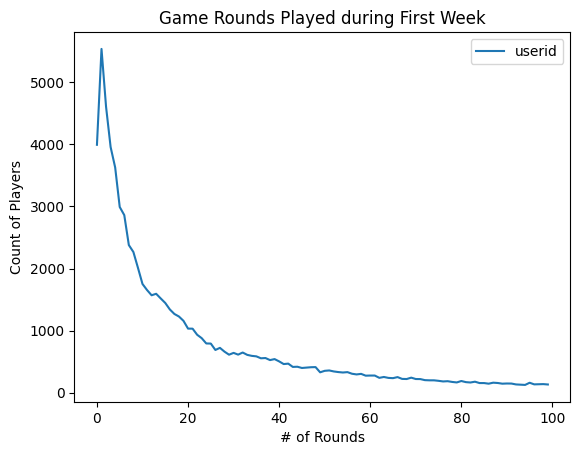

In [23]:
%matplotlib inline

plot_df = df.groupby('sum_gamerounds').count().reset_index()

ax = plot_df.head(n=100).plot('sum_gamerounds', 'userid')
ax.set_xlabel("# of Rounds")
ax.set_ylabel("Count of Players")
ax.set_title("Game Rounds Played during First Week");

In [24]:
df['retention_1'].mean()

0.4452095044850259

In [25]:
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

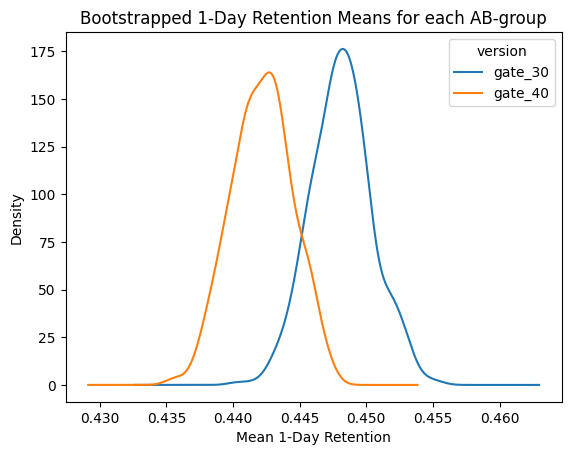

In [26]:
boot_1d = []
iterations=500
for i in range(iterations):
    boot_mean = df.sample(frac=1, replace=True).groupby(
        'version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
boot_1d = pd.DataFrame(boot_1d)
    
ax = boot_1d.plot.kde()
ax.set_title('Bootstrapped 1-Day Retention Means for each AB-group')
ax.set_xlabel('Mean 1-Day Retention');

In [27]:
boot_1d.head()

version,gate_30,gate_40
retention_1,0.444395,0.439805
retention_1,0.448888,0.438465
retention_1,0.447259,0.443658
retention_1,0.448184,0.442377
retention_1,0.449310,0.440334


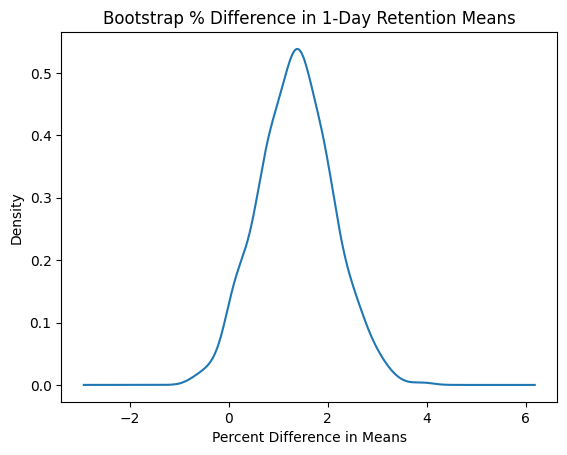

In [28]:
boot_1d['diff'] = ((boot_1d.gate_30 - boot_1d.gate_40)
                   / boot_1d.gate_40 * 100)

ax = boot_1d['diff'].plot.kde()
ax.set_xlabel('Percent Difference in Means')
ax.set_title('Bootstrap % Difference in 1-Day Retention Means');

In [29]:
prob = (boot_1d['diff'] > 0).sum() / len(boot_1d['diff'])

'{0:.1%}'.format(prob)

'97.8%'

In [30]:
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

'99.8%'

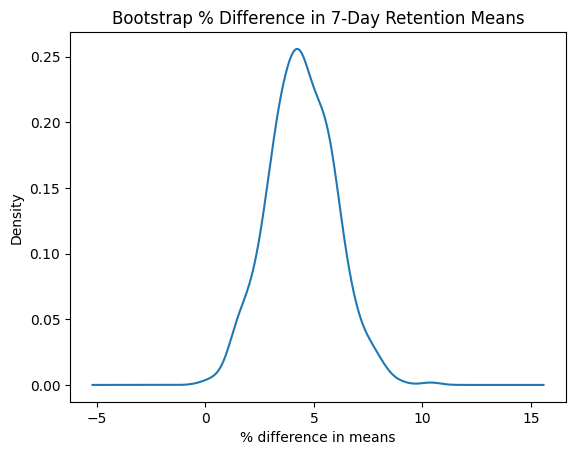

In [31]:
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
boot_7d = pd.DataFrame(boot_7d)

boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) / 
                   boot_7d['gate_40'] * 100)

ax = boot_7d['diff'].plot.kde()
ax.set_xlabel("% difference in means")
ax.set_title('Bootstrap % Difference in 7-Day Retention Means');

prob = (boot_7d['diff'] > 0).mean()

'{0:.1%}'.format(prob)

Результат bootstrap говорит нам о том, что существуют убедительные доказательства того, что 7-дневное "удержание"(Retention) выше, когда "ворота" находятся на уровне 30, чем когда они находятся на уровне 40. Вывод таков: если мы хотим сохранить высокое "удержание" — и 1-дневное, и 7-дневное  "удержание" — мы не должны перемещать "ворота" с уровня 30 на уровень 40.

Иными словами, когда "ворота" перемещаются на уровень 40, меньше игроков дойдут до них и они с большей вероятностью выйдут из игры.

